# Librerías

In [4]:
# Main libraries
import os
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Warnings
import warnings;
warnings.simplefilter('ignore')

# Path
ROOT_PATH = os.path.abspath(os.path.join('../'+os.path.dirname('__file__')))

# Simulación

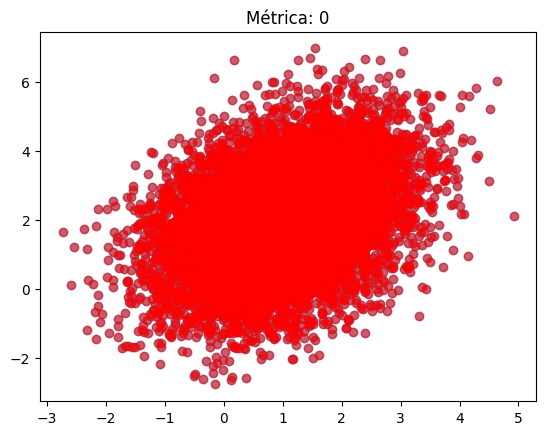

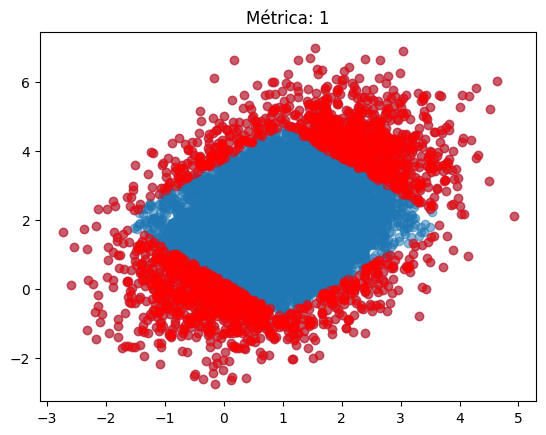

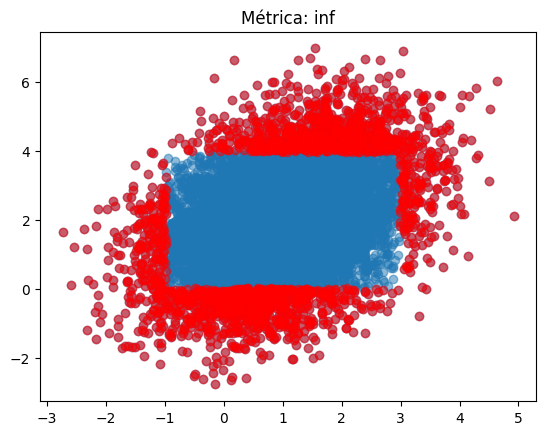

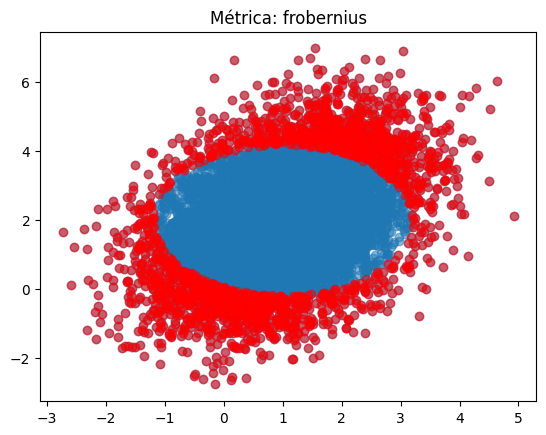

In [53]:
# Definir la media y la matriz de covarianza
mean = [1, 2]
cov = [[1, 0.5], [0.5, 2]]

# Crear la distribución normal bivariante
rv = multivariate_normal(mean, cov)

# Simular 10000 datos de la distribución normal bivariante
samples = rv.rvs(size=10000)

# Calcular la distancia de cada dato a la media
list_distances = [0, 1, np.inf, None]

for dist in list_distances:
    distances = np.linalg.norm(samples - mean, axis=1, ord = dist)

    # Encontrar los puntos cuya distancia a la media se encuentra en el 20% de las mayores distancias
    threshold = np.percentile(distances, 80)
    red_points = samples[distances >= threshold]

    # Graficar los datos
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)

    # Pintar de rojo los puntos seleccionados
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5)
    
    # Nombre de la métrica
    if dist == None:
        dist = 'frobernius'
    plt.title('Métrica: ' + str(dist))

    # Guardar la imagen
    path_graph = os.path.join(
            ROOT_PATH,
            'data', 'dist',
            'output','met_'+
            str(dist) +
            '_plot.png')
    plt.savefig(path_graph)
    # Mostrar el gráfico
    plt.show()

# Pruebas en 3d

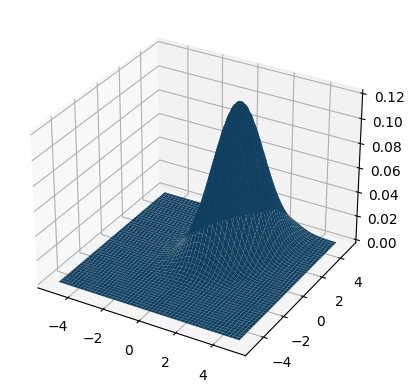

In [2]:
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
z = rv.pdf(pos)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
plt.show()